# Pràctica 2: Llei del refredament

## 1. El problema del cafè
Guardem les dades d'evolució temporal de la temperatura del cafè

In [1]:
Temp = [85, 73, 64, 58]
TempEnElTemps = zip(range(0,91,30), Temp)
show(TempEnElTemps)
TAmb = 15

[(0, 85), (30, 73), (60, 64), (90, 58)]

La llei de refredament de Newton ens dóna l'equació diferencial que governa l'evolució de la temperatura, $T' = -k(T - T_e)$ on $T_e$ és la temperatura ambient. Si imposem condicions inicials $T(0) = T_0$ la solució és $$ T(t) = T_e + (T_0 - T_e) e^{-kt} $$

Fem un gràfic de diferents solucions en funció de la condició inicial $T_0$

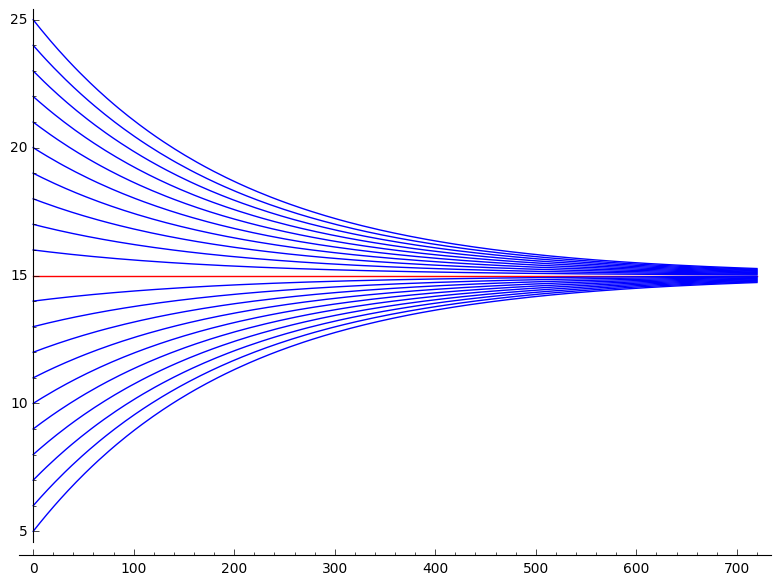

In [2]:
var('k, T0')
T(t) = TAmb + (T0 - TAmb)*exp(-k*t)
Ts = filter(lambda x: x!= TAmb, map(lambda x: x, range(5,26,1)))
sols1 = map(lambda x: T.subs(k == 0.005, T0 == x), Ts) 
grafics1 = map(lambda f: plot(f(t), xmin = 0, xmax = 720), sols1)
plot(TAmb, xmin = 0, xmax = 720, color = 'red') + reduce(lambda a, b:  a+b, grafics1)

Aproximem la derivada de la temperatura

In [3]:
dTemp= map(lambda T1, T2: (T1 - T2)/30, Temp[1:], Temp[:-1])
show(dTemp)

[-2/5, -3/10, -1/5]

Veiem com evoluciona la relació entre $T'$ i $T - T_e$

In [4]:
kAprox = map(lambda dT, T : -dT/(T - TAmb), dTemp, Temp[:-1])
show(kAprox)

[1/175, 3/580, 1/245]

Calculem la mitjana d'aquestes aproximacions

In [5]:
kAvg = reduce(lambda a,b : a + b, kAprox)/len(kAprox)
show(kAvg.n())

0.00498944405348346

Fem una gràfica fent servir aquest valor de $k$

In [6]:
T1 = T.subs(T0 == Temp[0], k == kAvg)

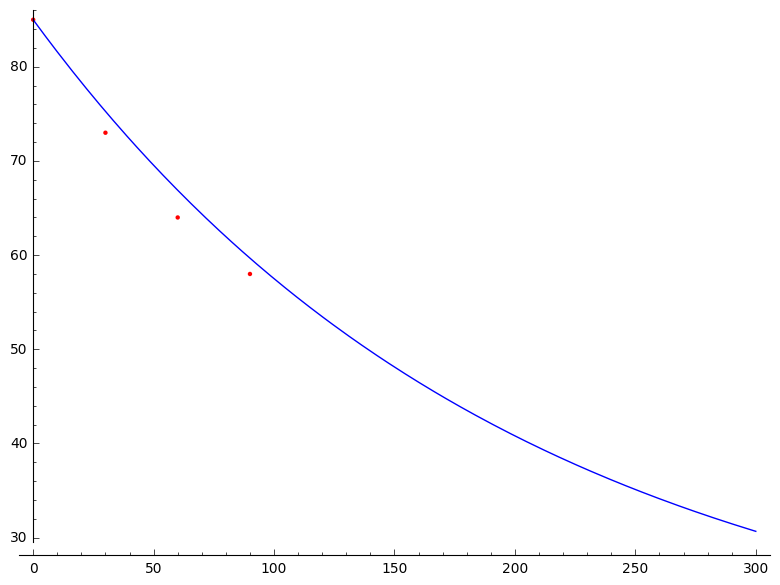

In [7]:
plot(T1(t), xmin = 0, xmax = 300) + list_plot(TempEnElTemps, color = 'red')

Fem servir el model per predir la temperatura al cap de 5 minuts

In [8]:
show(T1(300).n())

30.6686519621892

També podem saber el temps que ha de passar per poder prendre el cafè a $35 ºC$

In [9]:
t35 = find_root(T1(t) == 35, 0, 1000) / 60
show(t35)

4.184711279341603

## 2. El problema de mantenir el cafè calent

Volem valorar per a quin valor de $k$ el cafè es mantindrà per sobre dels $35ºC$ durant els primers 10 minuts

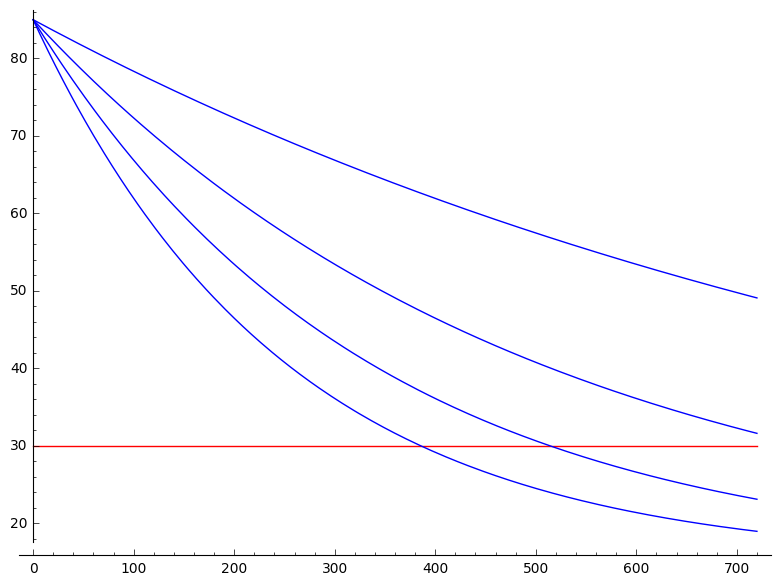

In [10]:
ks = map(lambda x: x*0.001, range(1,5))
sols = map(lambda x: T.subs(T0 == Temp[0], k == x), ks)
grafics = map(lambda f : plot(f(t), xmin = 0, xmax = 720), sols)
plot(30, xmin = 0, xmax = 720, color = 'red') + reduce(lambda a, b:  a+b, grafics)

Veiem que $k \in [0.002, 0.003]$. Podem refinar l'aproximació

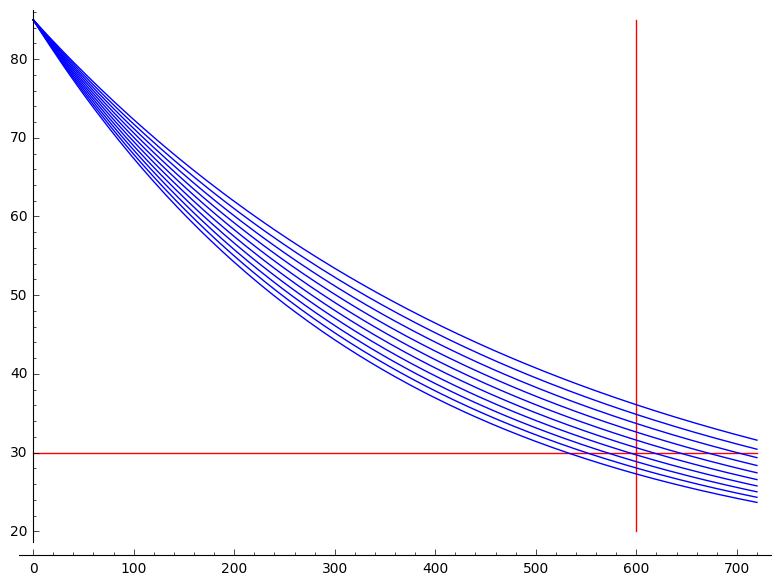

In [11]:
ks = map(lambda x: 0.002 + x*0.0001, range(10))
sols = map(lambda x: T.subs(T0 == Temp[0], k == x), ks)
grafics = map(lambda f : plot(f(t), xmin = 0, xmax = 720), sols)
plot(30, xmin = 0, xmax = 720, color = 'red') + line([(600,20), (600,85)], color = 'red') + reduce(lambda a, b:  a+b, grafics)

I per tant $k \in [0.0025, 0.0026]$. Per a trobar el valor exacte podem solucionar l'equació.

In [12]:
minim = T.subs(T0 = Temp[0])
kMin = find_root(minim(600) == 30, 0.0025, 0.0026)
show(kMin)

0.00256740840161252

Modelem ara l'evolució de la temperatura del cafè si tenim un escalfador que proporciona un flux de temperatura $q$, de manera que ara l'equació diferencial és $$T' = q - k(T - T_e)$$

In [13]:
var('t, q'); function('f')(t)
T2(t) = desolve(diff(f(t), t) == q - kAvg*(f(t) - TAmb), [f(t), t], ics = [0, Temp[0]])

Fem un gràfic de les solucions per a diferents valors de $q$ i busquem una primera aproximació de la mínima $q$ que manté el cafè a 30 ºC durant els primers 10 minuts

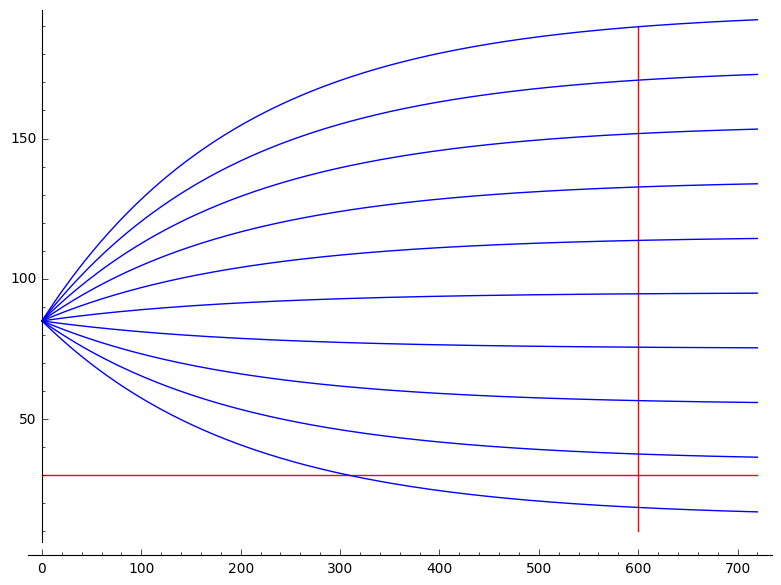

In [14]:
qs = map(lambda x: x*0.1, range(10))
sols2 = map(lambda x: T2.subs(q == x), qs)
grafics = map(lambda f : plot(f(t), xmin = 0, xmax = 720), sols2)
plot(30, xmin = 0, xmax = 720, color = 'red') + line([(600,10), (600,190)], color = 'red') + reduce(lambda a, b:  a+b, grafics)

Veiem que $q \in (0, 0.1)$. En calculem el valor exacte:

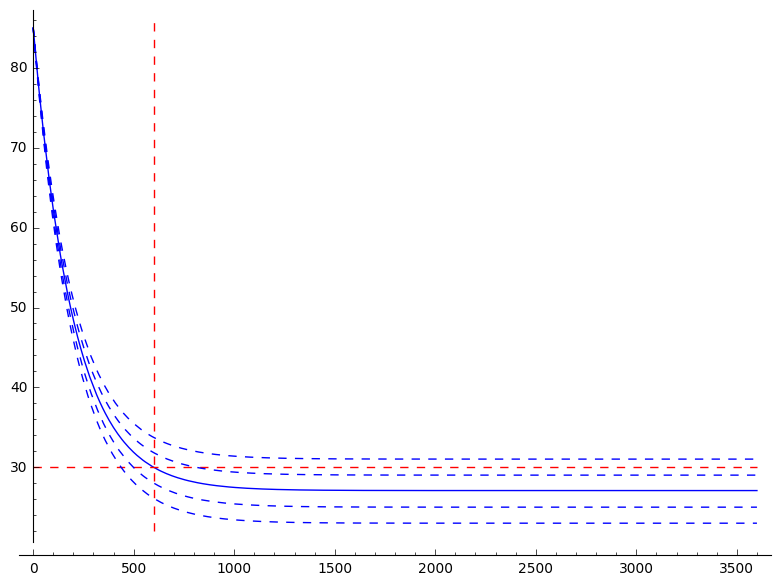

In [15]:
qMin = find_root(T2(600) - 30,0 , 0.1)
plot(T2.subs(q == qMin), xmin = 0, xmax = 3600) \
+ plot(30, xmin = 0, xmax = 3600, color = 'red', linestyle = '--') \
+ line([(600,22), (600,86)], color = 'red', linestyle = '--') \
+ reduce(lambda a, b: a + b, \
         map(lambda f : plot(f(t), xmin = 0, xmax = 3600, linestyle = '--'), \
             map(lambda x: T2.subs(q == x), map(lambda x: x*0.01, [4,5,7,8]))))

Ja veiem que amb aquesta $q$ la temperatura eventualment baixa dels 30 ºC. Veiem, però, que amb una $q$ de $0.08$ ens mantenim sempre per sobre dels 30 ºC. Calculem la $q$ que fa que el valor límit de la temperatura sigui 30 ºC.

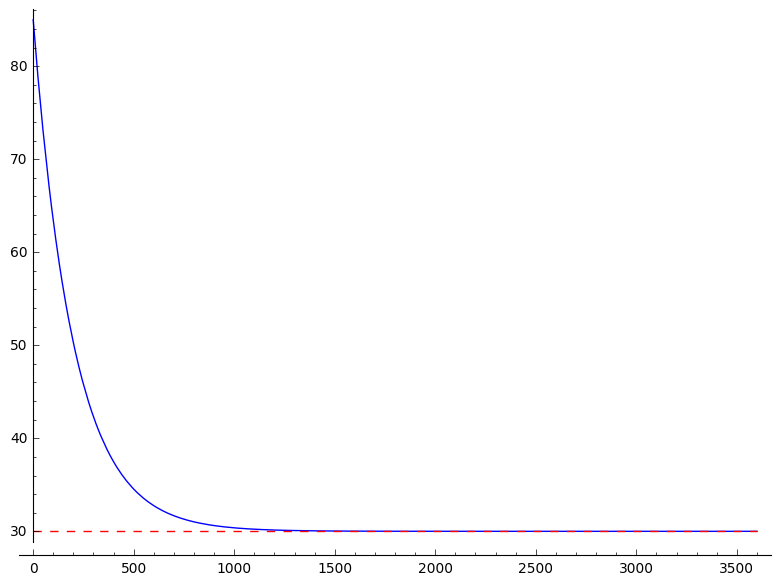

In [16]:
qLim = find_root(limit(T2(t), t = oo) - 30, 0.07, 0.08)
plot(T2.subs(q == qLim), xmin = 0, xmax = 3600) \
+ plot(30, xmin = 0, xmax = 3600, color = 'red', linestyle = '--')

## 3. El problema del cafè amb gel
Posem que la temperatura del gel segueix la llei de newton, de manera que $$T_g' = -k'(T_g - T_c),$$ amb $T_g$ la temperatura del gel i $T_c$ la temperatura del cafè. Així, si considerem que el gel cedeix la seva temperatura al cafè tenim $$T_c' = -T_g' -k(T_c - T_e),$$ de manera que obtenim el sistema
$$T_c' = k'(T_g - T_c) -k(T_c - T_e)$$
$$T_g' = -k'(T_g - T_c)$$
amb condicions inicials $T_g(0) = 0$ i $T_c(0) = 85$. No coneixem el valor de $k'$, però podem suposar que serà de l'ordre de la $k$ que hem determinat abans.

In [17]:
x = function('T_c')(t)
y = function('T_g')(t)
var('k_g')
eq1 = diff(x,t) == k_g*(y - x) - kAvg*(x - TAmb)
eq2 = diff(y,t) == -k_g*(y - x)
solu = desolve_system([eq1, eq2], [x, y], ivar = t, ics = [0,85,0])
T_c(t) = solu[0].rhs()
T_g(t) = solu[1].rhs()

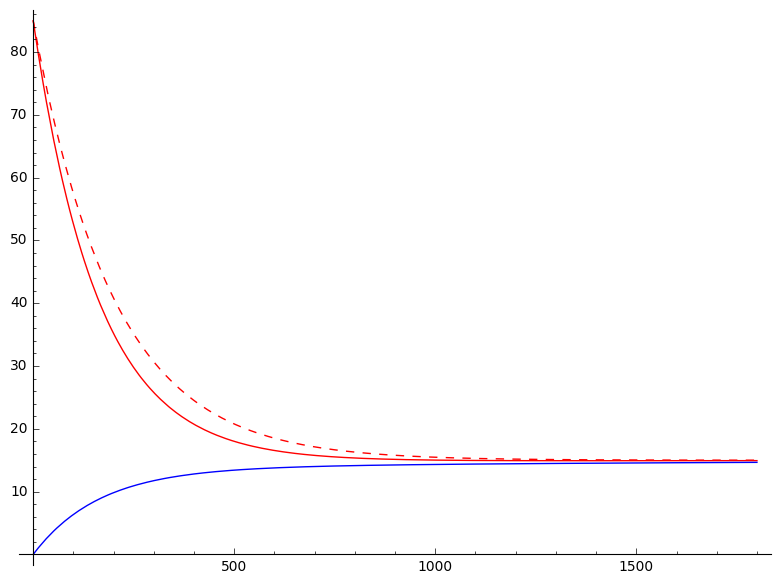

In [18]:
plot(T_c.subs(k_g == 0.001), xmin = 0, xmax = 1800, color = 'red') \
+ plot(T_g.subs(k_g == 0.001), xmin = 0, xmax = 1800, color = 'blue') \
+ plot(T1, xmin = 0, xmax = 1800, color = 'red', linestyle = '--')

Observem que la temperatura límit del cafè és la mateixa amb o sense gel.

In [19]:
assume(k_g > 0)
show(limit(T_c(t), t = oo))

15